In [2]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1 ~ 4] 데이터 준비 
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

# 결측치 대체
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())               

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   

훈련 데이터:  (278, 1)
검증 데이터:  (120, 1)


In [12]:
'''
Step 5: 다항회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)          #X_train 데이터를 2차항으로 변형

print('원본 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  

poly.get_feature_names_out()

원본 데이터:  (278, 1)
2차항 변환 데이터:  (278, 3)


array(['1', 'weight', 'weight^2'], dtype=object)

In [15]:
# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print('R^2 결정계수: ', r_square)

R^2 결정계수:  0.7255470154177007


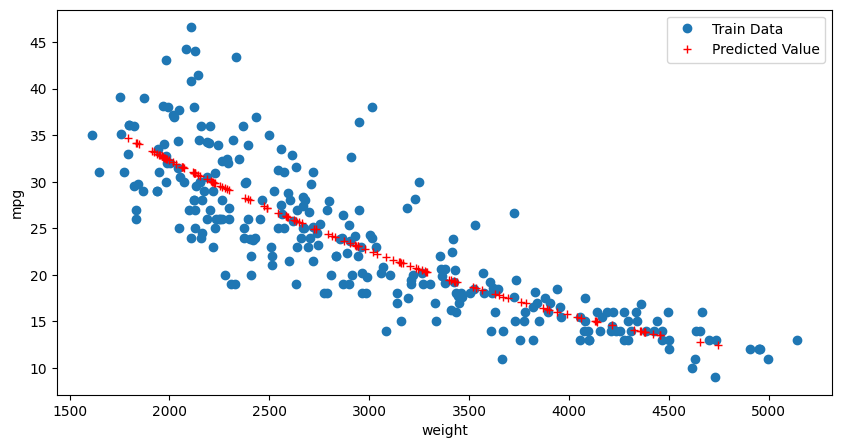

In [16]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = pr.predict(X_test_poly)

fig, axes = plt.subplots(figsize=(10, 5))
axes.plot(X_train, y_train, 'o', label='Train Data')         # 데이터 분포
axes.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
axes.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

In [17]:
# 모델에 test data 데이터를 입력하여 예측한 값 y_hat_test를 실제 값 y_test와 비교 
X_ploy = poly.fit_transform(X_test)

# 오차 계산
test_preds = pd.DataFrame(y_test)
test_preds.columns = ['y_test']
test_preds['y_hat'] = y_hat_test 
test_preds['squared_error'] = (test_preds['y_hat'] - test_preds['y_test'])**2

# 평균 제곱 오차
mse = test_preds['squared_error'].mean()
print('mse: ', mse)

mse:  15.813520500513508


In [18]:
# 사이킷런 함수 활용 (평균 제곱 오차)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_hat_test)
print('mse: ', mse)

mse:  15.813520500513508


In [19]:
# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_hat_test)
print('mae: ', mae)

mae:  3.1405650734449524


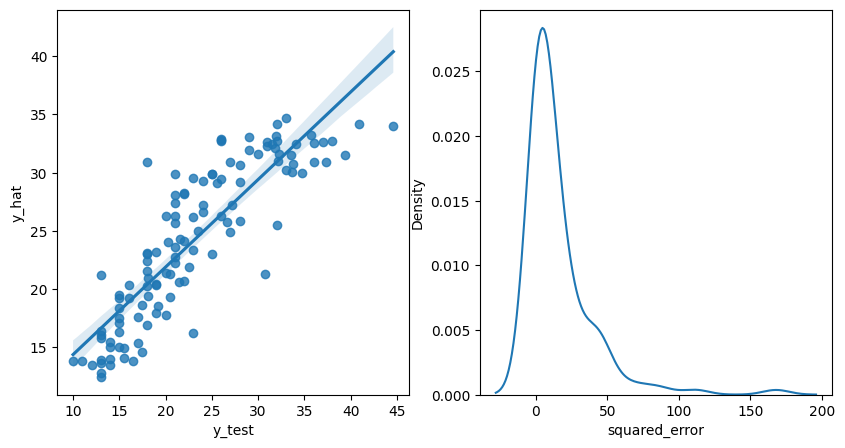

In [20]:
# 오차 분석
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.regplot(x='y_test', y='y_hat',  data=test_preds, ax=axes[0]);  
sns.kdeplot(x='squared_error',  data=test_preds, ax=axes[1]); 